# El Test de Dikey-Fuller

**Es un test que sirve para comprobar de manera formal si una serie es o no estacionaria**
**Se basa en que cuando el proceso que genera la serie tiene una raíz unitaria en el coeficiente, la serie no puede ser estacionaria. La hipótesis nula y alternativa del test son:**
* **H_0 : phi = 1** -> La serie es estacionaria
* **H_1 : phi < 1** -> La serie no es estacionaria

In [1]:
import import_ipynb
from SignalGenerator import generate_ar_process
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller

importing Jupyter notebook from SignalGenerator.ipynb


In [2]:
def perform_adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')

## Vamos a probar a generar varias series temporales con la función generate_ar_process para ver qué nos va devolviendo el test

### Probemos primero con una serie generada por un AR(1) process

* **Vamos a poner que phi sea 0.5, por lo que ya estamos diciendo que la serie es estacionaria, recordemos que una serie no es estacionaria cuando phi tiene raíces unitarias**

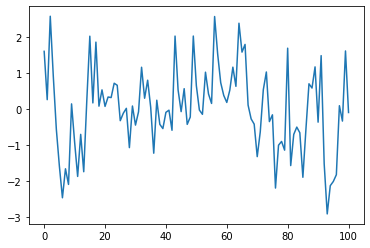

In [8]:
series = generate_ar_process(1, [.5], 100)
plt.plot(series)

In [9]:
perform_adf_test(series)

ADF Statistic: -5.1702989487226425
p-value: 1.0106345772733668e-05


Vemos como el p-valor sale pequeñísimo, lo que indica que la serie efectivamente es estacionaria.

Recordemos que el p-valor nos dice la probabilidad de que los resultados obtenidos, se hayan obtenido por pura casualidad, por lo que si esta probabilidad es lo suficientemente baja, se rechaza la hipótesis nula

* **Vamos a probar con un phi unitario, el test debería decirnos que la serie no es estacionaria**

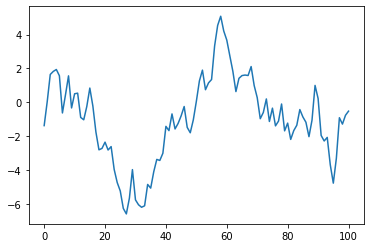

In [10]:
series = generate_ar_process(1, [1], 100)
plt.plot(series)

In [11]:
perform_adf_test(series)

ADF Statistic: -2.005973083426053
p-value: 0.28396026721133183


Vemos como ahora el p-valor sale muy elevado por lo que no podemos rechazar la hipótesis nula

### Probemos ahora con una serie generada por un AR(2) process

* **Vamos a probar para phi distinto de uno, es decir, el test debería de decirnos que la serie no es estacionaria**

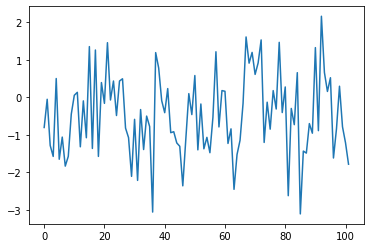

In [12]:
series = generate_ar_process(2, [.3, .5], 100)
plt.plot(series)

In [13]:
perform_adf_test(series)

ADF Statistic: -4.82694088894825
p-value: 4.828660021103899e-05


De nuevo, como no hemos dado ningún valor unitario a phi, el test concluye que la serie no es estacionaria

* **Ahora probemos con un valor unitario para el cual el test debería decir que la serie es unitaria**

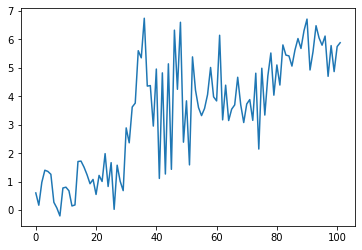

In [14]:
series = generate_ar_process(2, [.3, .7], 100)
plt.plot(series)

In [15]:
perform_adf_test(series)

ADF Statistic: -1.7508518773965442
p-value: 0.4051206368474305


Efectivamente el test no puede rechazar la hipótesis nula

In [1]:
 # Hola esto es para probar lo commits de GitHub